In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from glob import glob

RESULT_NAME = "1660417292_result_BS_32_MD_16_T_0_TT_0.5_K_2"
NSAMPLES = 10
THRESHOLD = 0.8

models = sorted(glob(f'_results/{RESULT_NAME}/*.onnx'))
models

['_results/1660417292_result_BS_32_MD_16_T_0_TT_0.5_K_2/net000.onnx',
 '_results/1660417292_result_BS_32_MD_16_T_0_TT_0.5_K_2/net001.onnx',
 '_results/1660417292_result_BS_32_MD_16_T_0_TT_0.5_K_2/net002.onnx',
 '_results/1660417292_result_BS_32_MD_16_T_0_TT_0.5_K_2/net003.onnx',
 '_results/1660417292_result_BS_32_MD_16_T_0_TT_0.5_K_2/net004.onnx',
 '_results/1660417292_result_BS_32_MD_16_T_0_TT_0.5_K_2/net005.onnx',
 '_results/1660417292_result_BS_32_MD_16_T_0_TT_0.5_K_2/net006.onnx',
 '_results/1660417292_result_BS_32_MD_16_T_0_TT_0.5_K_2/net007.onnx',
 '_results/1660417292_result_BS_32_MD_16_T_0_TT_0.5_K_2/net008.onnx',
 '_results/1660417292_result_BS_32_MD_16_T_0_TT_0.5_K_2/net009.onnx',
 '_results/1660417292_result_BS_32_MD_16_T_0_TT_0.5_K_2/net010.onnx',
 '_results/1660417292_result_BS_32_MD_16_T_0_TT_0.5_K_2/net011.onnx',
 '_results/1660417292_result_BS_32_MD_16_T_0_TT_0.5_K_2/net012.onnx',
 '_results/1660417292_result_BS_32_MD_16_T_0_TT_0.5_K_2/net013.onnx',
 '_results/166041729

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from ast import literal_eval as make_tuple
import matplotlib.pyplot as plt
import os

RESULT_NAME = "1660417292_result_BS_32_MD_16_T_0_TT_0.5_K_2"
figFolder = f'_results/{RESULT_NAME}_figures'
os.makedirs(figFolder, exist_ok=True)

data = pd.read_csv(f'_results/{RESULT_NAME}.txt', names=['score','acc','macs','params','path','fragments'])
# idxs = list(data['acc'].nlargest(NSAMPLES).index)


data = data[data.score>THRESHOLD]
data = data.sample(10).sort_values('score', ascending=False)
data

,score,acc,macs,params,path,fragments
26,0.999500,0.850688,6.010987e+07,2536800,_results/1660417292_result_BS_32_MD_16_T_0_TT_...,"((2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5..."
69,0.985452,0.940079,4.099839e+09,25530472,_results/1660417292_result_BS_32_MD_16_T_0_TT_...,"((3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5))"
27,0.941655,0.855010,6.116193e+07,3586400,_results/1660417292_result_BS_32_MD_16_T_0_TT_...,"((2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5..."
31,0.938729,0.836542,5.906857e+07,1497952,_results/1660417292_result_BS_32_MD_16_T_0_TT_...,"((2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5..."
70,0.922837,0.916110,4.099839e+09,25530472,_results/1660417292_result_BS_32_MD_16_T_0_TT_...,"((3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (1, 4))"
32,0.884149,0.787033,5.680017e+07,1989408,_results/1660417292_result_BS_32_MD_16_T_0_TT_...,"((2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5..."
78,0.843718,0.880354,1.546420e+10,121576232,_results/1660417292_result_BS_32_MD_16_T_0_TT_...,"((4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5..."
79,0.829547,0.869155,1.489643e+10,13905192,_results/1660417292_result_BS_32_MD_16_T_0_TT_...,"((4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5..."
11,0.817012,0.809234,6.979149e+08,44319528,_results/1660417292_result_BS_32_MD_16_T_0_TT_...,"((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 6..."
5,0.805144,0.823969,7.146950e+08,61100840,_results/1660417292_result_BS_32_MD_16_T_0_TT_...,"((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5..."


In [4]:
import os
models = []
# idxs = list(data.index)
for i,row in data.iterrows():
    # print(row.path)
    model = os.path.splitext(row.path)[0]+'.onnx'
    models.append(model)

In [5]:
# import numpy as np
# models
# models = np.random.choice(models, NSAMPLES)

In [6]:
import onnxruntime as ort
from tqdm import tqdm
import torch
import numpy as np
from stitchnet.ensemble.ensemble import get_ensemble_accuracy, get_ensemble_accuracy_accum
from stitchnet.stitchonnx.utils import load_cats_and_dogs_dset

dataset = load_cats_and_dogs_dset("test")
accs, indvaccs = get_ensemble_accuracy_accum(models, dataset)



/home/jupyter-steerapi/.conda/envs/stitchnet/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 80/80 [00:28<00:00,  2.84it/s]
/home/jupyter-steerapi/stitchnet/stitchnet/ensemble/ensemble.py:59: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  avg_ys.append(torch.nn.functional.softmax(torch.from_numpy(ys)))
100%|██████████| 80/80 [00:23<00:00,  3.38it/s]


In [7]:
with open(f'_results/{RESULT_NAME}_ensemble_{NSAMPLES}_T_{THRESHOLD}.txt', 'w') as f:
    for acc,indvacc in zip(accs,indvaccs):
        f.write(f'{acc},{indvacc}\n')

In [8]:
# accs

In [15]:
import pandas as pd
data = pd.read_csv(f'_results/{RESULT_NAME}_ensemble_{NSAMPLES}_T_{THRESHOLD}.txt', names=['acc', 'indvacc'])
accs = data.acc
indvaccs = data.indvacc

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


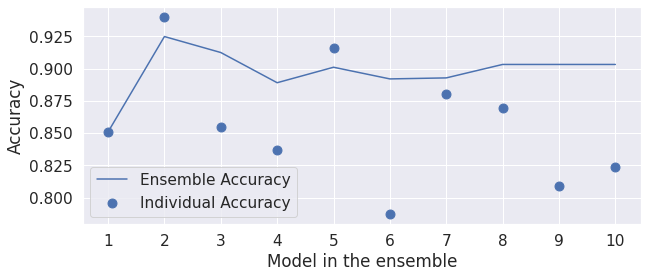

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set(font_scale = 1.4)

plt.figure(figsize=(10,4))
plt.plot(range(1,1+len(accs)), [d for d in accs], label='Ensemble Accuracy')
plt.scatter(range(1,1+len(indvaccs)), [d for d in indvaccs], s=80, label='Individual Accuracy')
plt.xlabel('Model in the ensemble')
plt.xticks(range(1,len(indvaccs)+1))
# plt.ylim(0.4,1)
plt.ylabel('Accuracy')
lgd = plt.legend(loc=3)

plt.savefig(f'{figFolder}/ensemble.eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [10]:
# accs